<h1>Credit Card Fraud Detection</h1>

The goal of this project is to predict if a transaction is fraudulent from 28 anonymous features and an amount.


Supervised machine learning method implementation step are:

<ol>
  <li>EDA</li>
  <li>feature engineering</li>
  <li>feature selection</li>
  <li>classification</li>
  <li>discussion</li>
</ol>

<b>About the dataset</b><br>
Link to hte dataset at GitHub: https://github.com/rashida048/Datasets/blob/master/fraud_data.csv<br><br>

This dataset is about credit card fraud detection. The feature names aren't available. It has a binary column that indicates if a transaction is fraudulent or not. This dataset can be used for classification models.

<b>Results</b><br>
With all variables included and originally distributed, XGBoost classifier demonstrates ROC AUC score 0.979. Probability cutoff 0.5 results in precision 0.94 and recall 0.84.


<h2>1. EDA</h2>

In [1]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# importing libraries
from platform import python_version
import warnings

# for working with arrays and dataframes
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import scipy
import scipy.stats as stats # for Q-Q plots

# for plotting
import matplotlib.pyplot as plt #for plotting data
import seaborn as sns # for plotting data
import scipy
import scipy.stats as stats # for Q-Q plots

# for validation
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score

# for classification
import xgboost
from xgboost import XGBClassifier

# for evaluation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import shap

In [3]:
# showing versions
print('Python version:',python_version())
print('NumPy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('SciPy version:',scipy.__version__)
print('Sklearn version:',sklearn.__version__)
print('XGBoost version:',xgboost.__version__)
print('Shap version:',shap.__version__)

Python version: 3.7.14
NumPy version: 1.21.6
Pandas version: 1.3.5
SciPy version: 1.7.3
Sklearn version: 1.0.2
XGBoost version: 0.90
Shap version: 0.41.0


In [4]:
# settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [5]:
# importing the dataset
df = pd.read_csv("fraud_data.csv")
print(f"{df.shape[1]} columns, {df.shape[0]} rows")
# checking duplicated rows
print(f"{df.duplicated().sum()} duplicated rows")
print('removing duplicates...')
df.drop_duplicates(inplace=True)
print(f"{df.duplicated().sum()} duplicated rows")
df.head()

30 columns, 21693 rows
143 duplicated rows
removing duplicates...
0 duplicated rows


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,1.535776,1.019947,-0.096511,0.573023,0.215214,0.265249,-0.612064,0.093821,-0.064890,-0.137258,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,-0.007688,-1.087403,-0.720270,0.855185,-1.070011,-0.869661,0.395302,0.635695,0.249401,1.341809,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,0.726218,0.347648,-0.806752,0.531268,-0.806538,0.154996,-0.319935,-0.335550,-0.648994,-0.232185,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,-1.027847,-3.220699,3.007008,0.794679,-1.504351,-0.380985,0.667344,0.676138,-0.419469,0.348269,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,0.148566,-0.474103,-0.011319,-0.410223,1.648979,0.218394,-0.239475,0.422933,1.274986,0.402329,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [6]:
# making a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# determining percentage of missing values (expressed as decimals)
# and displaying the result ordered by percent of missin data

df[vars_with_na].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

In [7]:
# showing data types
df.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
# statistics of the data set
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000,21550.000000
mean,-0.036547,0.044165,-0.079662,0.056684,-0.037196,-0.030833,-0.066622,0.006927,-0.044095,-0.086981,0.063584,-0.091154,0.000078,-0.086809,-0.007992,-0.053081,-0.094628,-0.031292,0.022811,-0.000712,0.008076,0.006185,-0.002914,-0.004624,-0.002034,0.002203,0.001546,0.003097,87.203073,0.016056
std,2.092170,1.681791,1.850424,1.538158,1.521778,1.330158,1.562575,1.318763,1.156803,1.340121,1.148566,1.354433,0.991428,1.338749,0.916688,1.088563,1.406832,0.934308,0.844682,0.728131,0.765257,0.731507,0.627641,0.599227,0.521377,0.478544,0.421338,0.302505,236.275842,0.125693
min,-41.928738,-40.803981,-31.103685,-4.848504,-32.092129,-20.367836,-41.506796,-38.987263,-13.434066,-24.403185,-3.995739,-18.553697,-3.844974,-19.214325,-4.498945,-14.129855,-24.019099,-9.498746,-4.395283,-21.024817,-21.453736,-8.887017,-21.303666,-2.766638,-4.541819,-1.855355,-7.764147,-6.520075,0.000000,0.000000
25%,-0.933010,-0.595375,-0.948050,-0.852481,-0.700147,-0.778907,-0.565478,-0.206237,-0.671871,-0.554469,-0.743932,-0.439243,-0.635220,-0.437492,-0.587854,-0.494032,-0.497283,-0.513084,-0.446332,-0.209977,-0.224731,-0.536275,-0.163327,-0.357457,-0.319252,-0.326738,-0.070242,-0.053309,5.490000,0.000000
50%,-0.007161,0.076209,0.182884,-0.013552,-0.066487,-0.282499,0.032245,0.022768,-0.074955,-0.099292,0.005672,0.127658,-0.016599,0.044793,0.045088,0.059982,-0.075292,-0.017056,0.022171,-0.056594,-0.023630,0.008826,-0.012758,0.035418,0.009352,-0.044950,0.002460,0.011821,22.040000,0.000000
75%,1.311966,0.821641,1.025099,0.773996,0.608484,0.374724,0.566569,0.323863,0.590787,0.447786,0.785976,0.615074,0.655743,0.490180,0.636769,0.526135,0.389992,0.496943,0.487923,0.140488,0.192953,0.530912,0.146525,0.429736,0.352028,0.239126,0.096396,0.082130,77.187500,0.000000
max,2.451888,21.467203,4.069865,12.114672,29.162172,21.393069,34.303177,20.007208,9.125535,12.701538,12.018913,3.966626,4.099352,6.441021,5.720479,6.442798,6.609366,3.790316,4.851255,13.119819,27.202839,8.361985,15.626067,4.014444,5.541598,3.463246,9.879903,9.876371,7712.430000,1.000000


In [9]:
# identifying categorical values
# capturing type object
cat_vars = ['Class']
cat_vars

['Class']

<b>Numerical variables</b>

In [10]:
# identifying the numerical variables
num_vars = [var for var in df.columns if var not in cat_vars]
print(num_vars)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [11]:
# function to create histogram, Q-Q plot and boxplot
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()

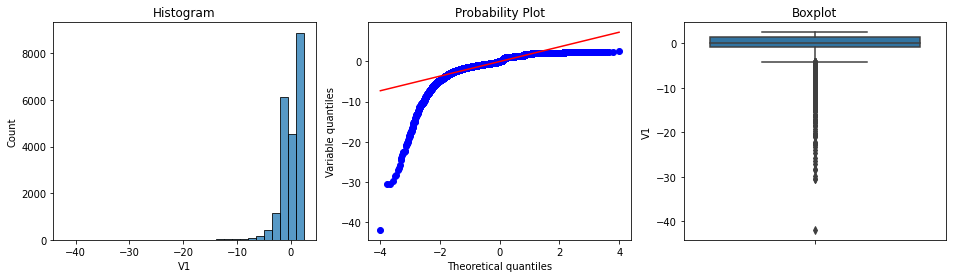

V1: skewnessis -3.82, kurtosis 36.14


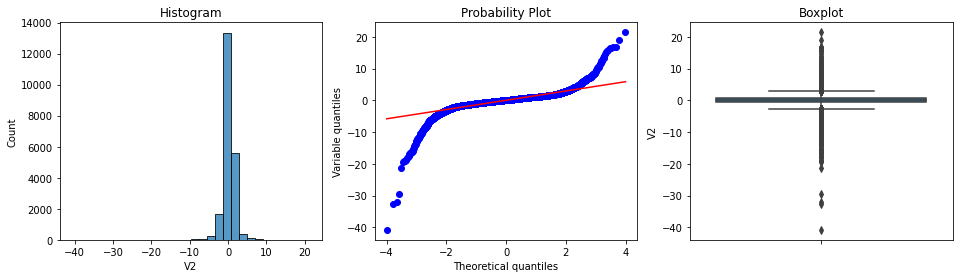

V2: skewnessis -2.46, kurtosis 55.60


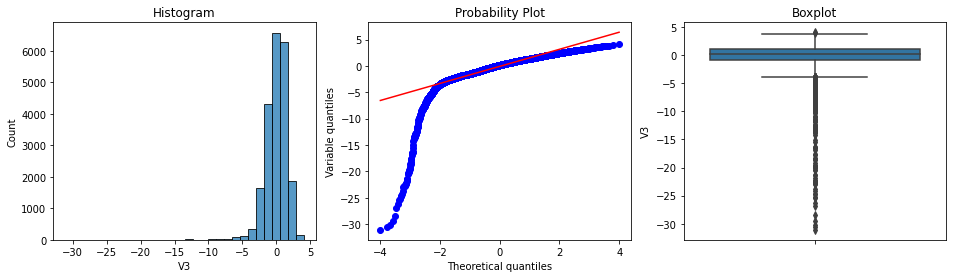

V3: skewnessis -4.42, kurtosis 48.09


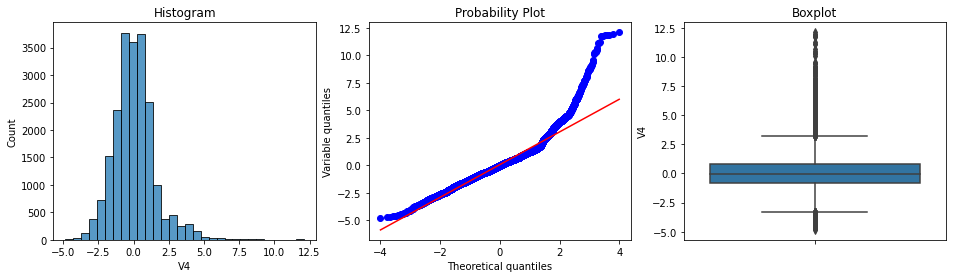

V4: skewnessis 1.19, kurtosis 4.89


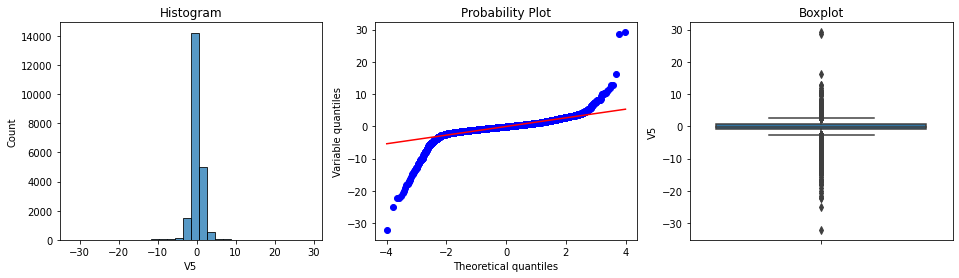

V5: skewnessis -1.91, kurtosis 51.98


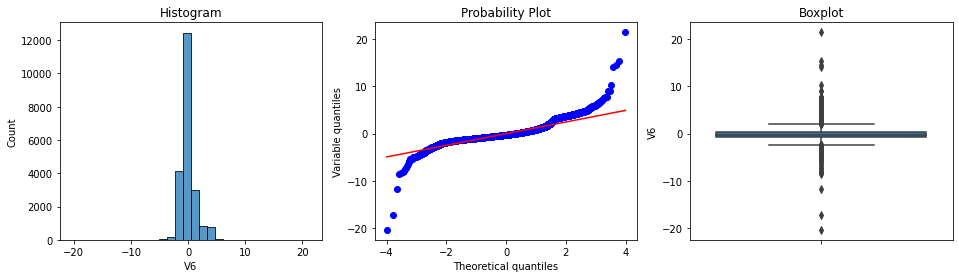

V6: skewnessis 1.28, kurtosis 12.75


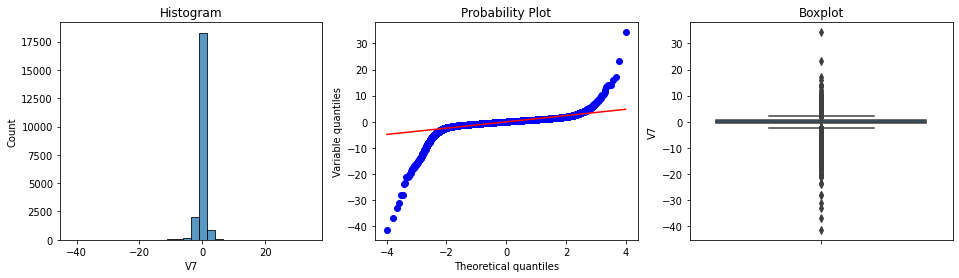

V7: skewnessis -5.30, kurtosis 116.75


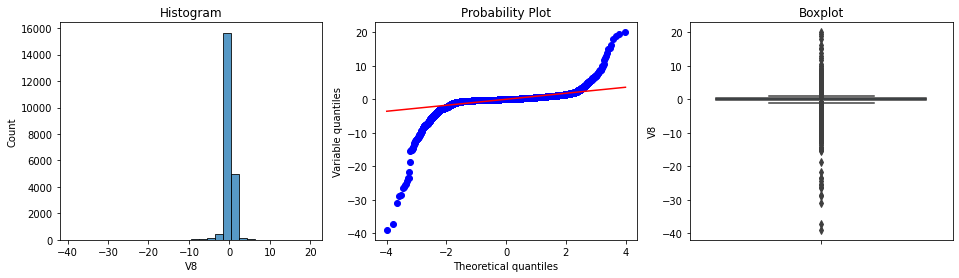

V8: skewnessis -7.25, kurtosis 177.95


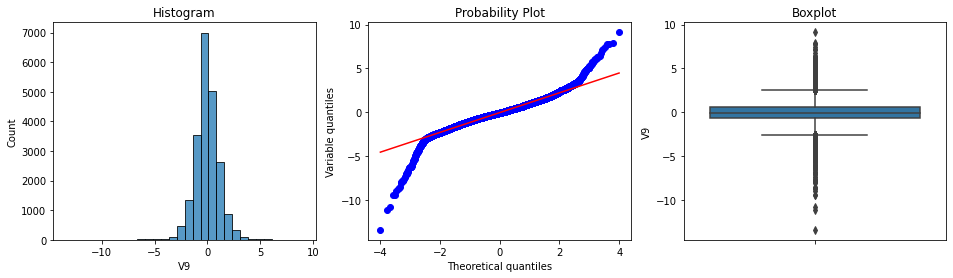

V9: skewnessis -0.24, kurtosis 6.12


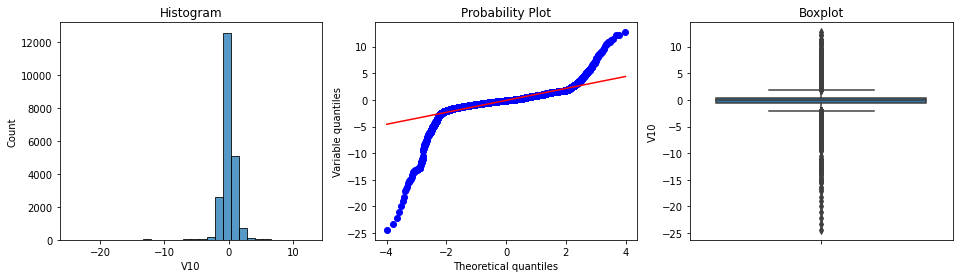

V10: skewnessis -3.34, kurtosis 50.72


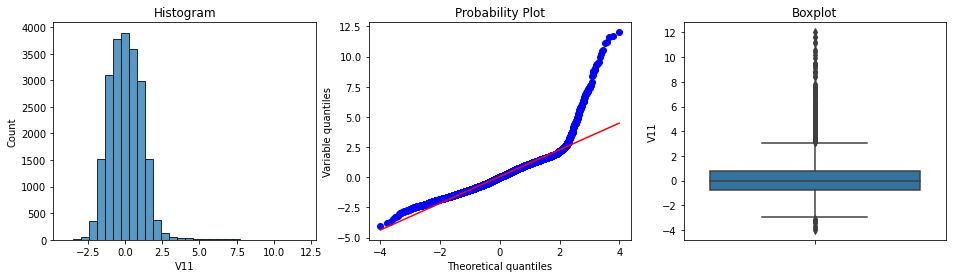

V11: skewnessis 1.40, kurtosis 8.30


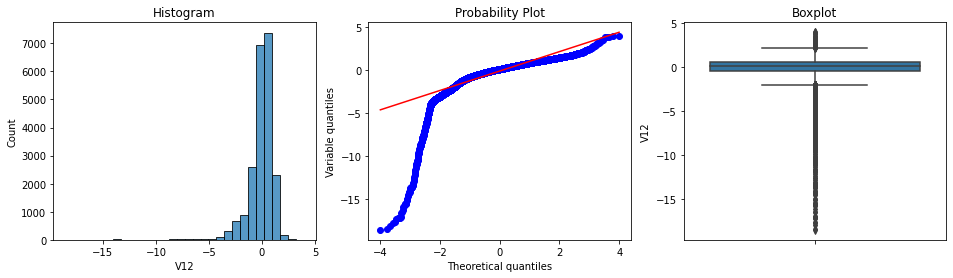

V12: skewnessis -4.69, kurtosis 41.51


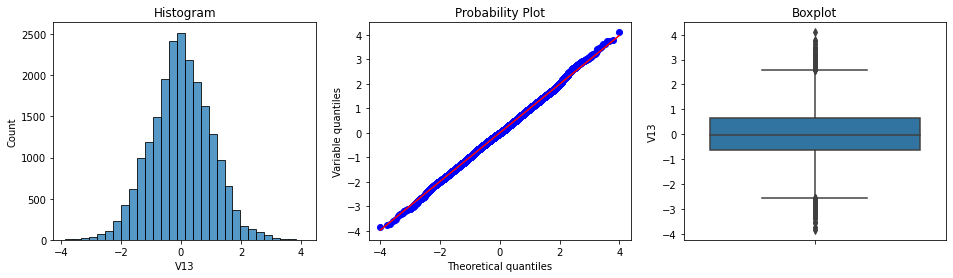

V13: skewnessis 0.03, kurtosis 0.17


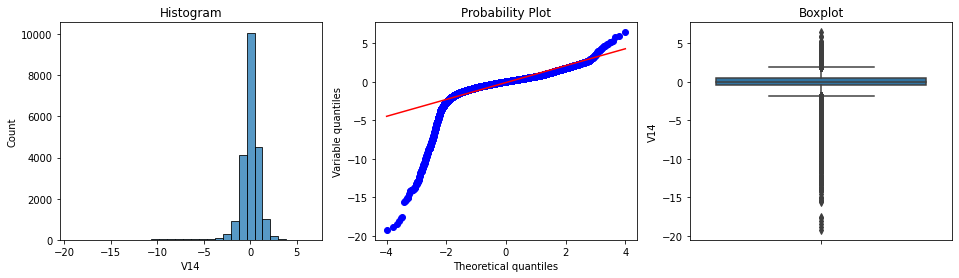

V14: skewnessis -4.68, kurtosis 40.99


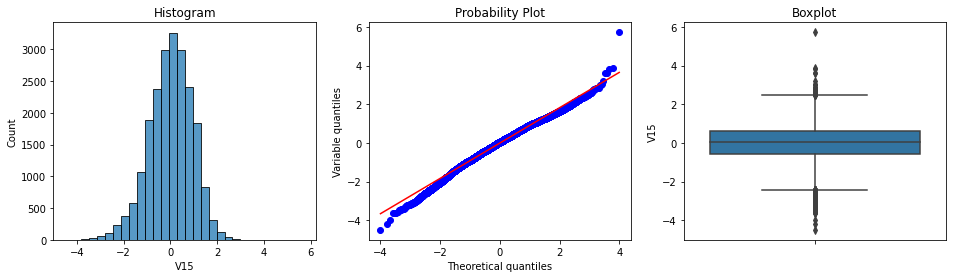

V15: skewnessis -0.32, kurtosis 0.38


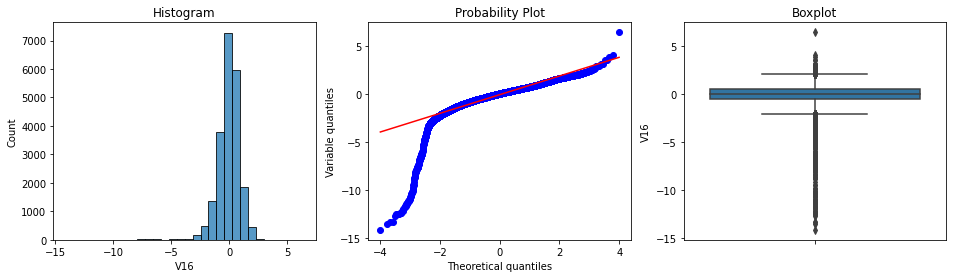

V16: skewnessis -3.47, kurtosis 29.91


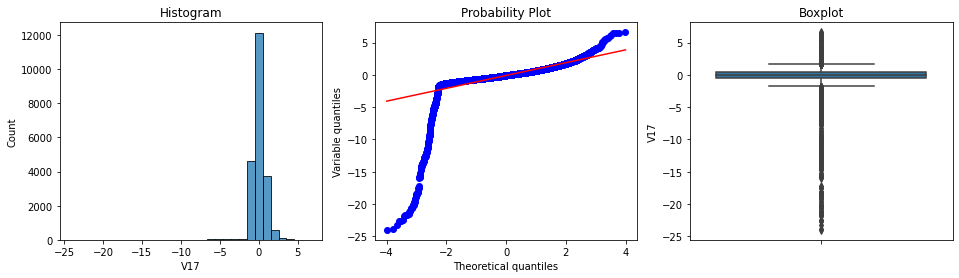

V17: skewnessis -7.93, kurtosis 100.75


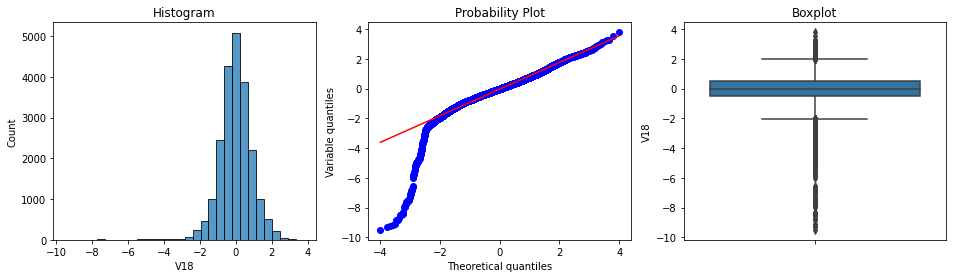

V18: skewnessis -1.47, kurtosis 10.96


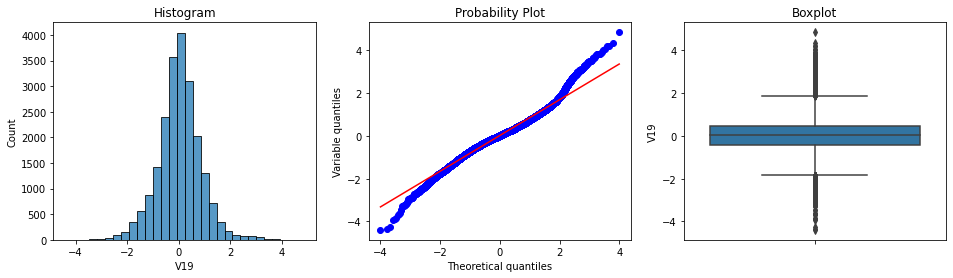

V19: skewnessis 0.17, kurtosis 1.87


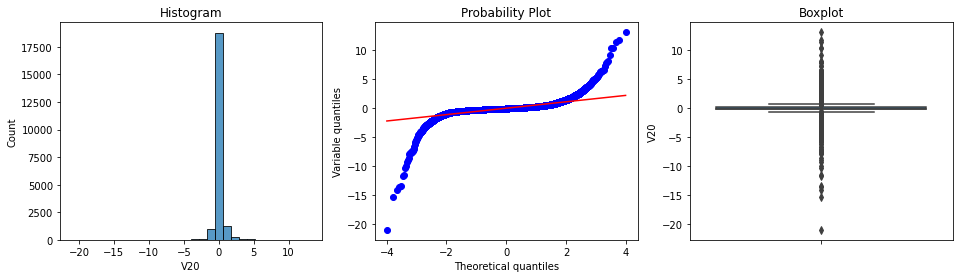

V20: skewnessis -1.81, kurtosis 106.28


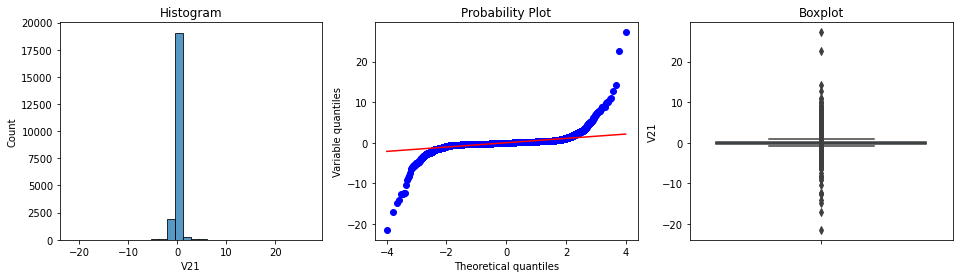

V21: skewnessis 2.42, kurtosis 214.96


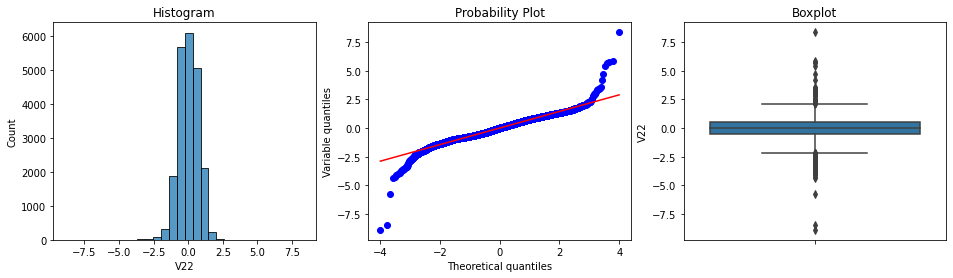

V22: skewnessis -0.12, kurtosis 3.90


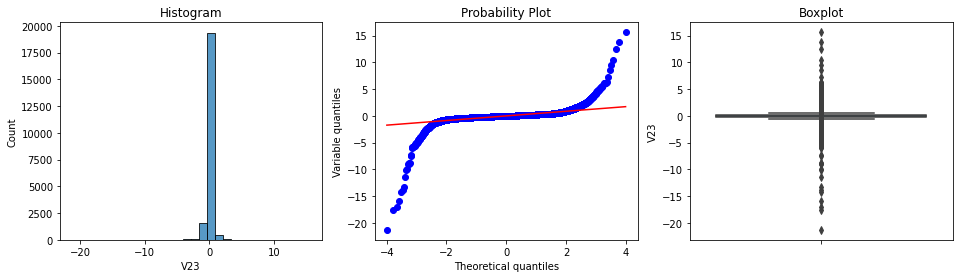

V23: skewnessis -5.05, kurtosis 244.54


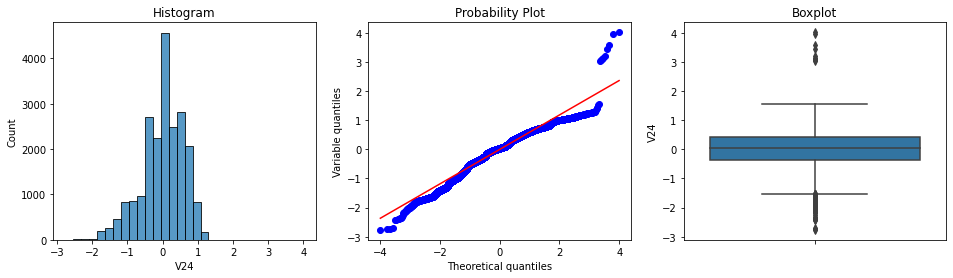

V24: skewnessis -0.55, kurtosis 0.70


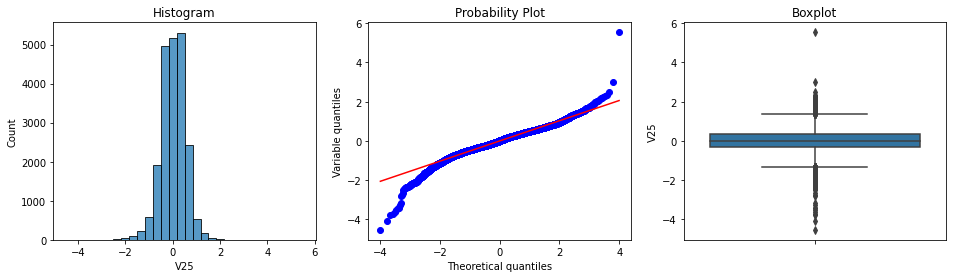

V25: skewnessis -0.42, kurtosis 2.96


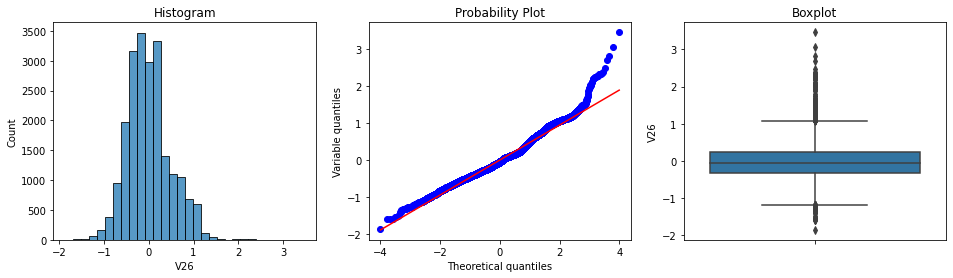

V26: skewnessis 0.55, kurtosis 0.77


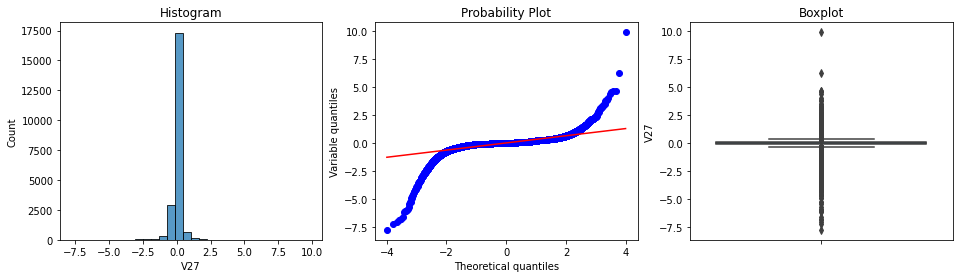

V27: skewnessis -2.86, kurtosis 76.78


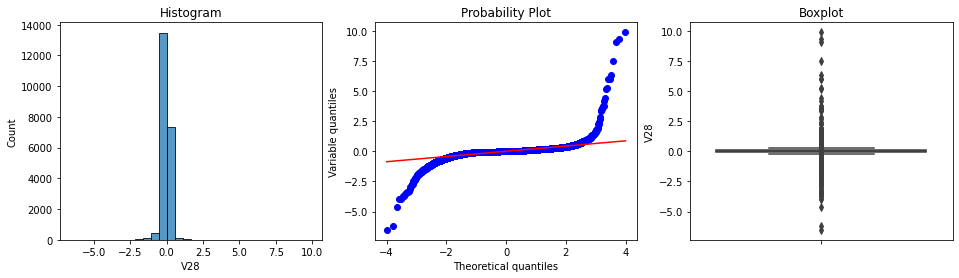

V28: skewnessis 4.60, kurtosis 227.34


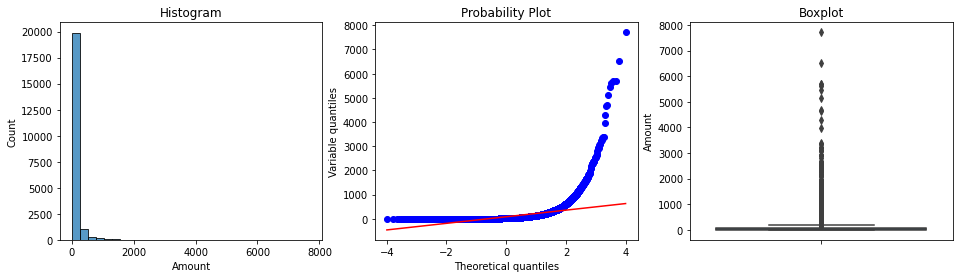

Amount: skewnessis 10.72, kurtosis 196.94


In [12]:
# plotting the variables
for variable in num_vars:
    diagnostic_plots(df, variable)
    # printing skewness
    skewness = df[variable].skew()
    kurtosis = df[variable].kurtosis()
    print(f"{variable}: skewnessis {skewness:.2f}, kurtosis {kurtosis:.2f}")

Discussion: Amount is right skewed with high kurtosis and possible outliers at high values. Most of the variables are skewed or/and have high kurtosis. Possible outliers do not seem acute.

<b>Categorical variable</b>

0    21204
1      346
Name: Class, dtype: int64



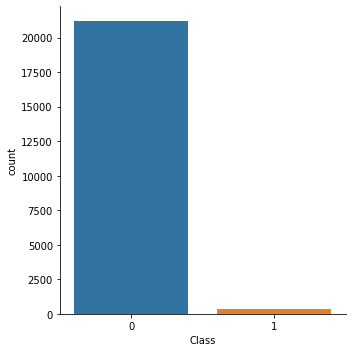

In [13]:
# plotting quality variable
print(df['Class'].value_counts(dropna=False),end='\n\n')
ax = sns.catplot('Class', data=df, kind='count', aspect=1)

Discussion: Target is imbalanced with under-represented class 1, fraudulent.

In [14]:
# taking a look at variables with the target
print("Variable | mean trustworthy | mean fraudulent")
for var in num_vars:
    mean0 = df[df['Class'] == 0][var].mean()
    mean1 = df[df['Class'] == 1][var].mean()
    print(f"{var:>8} | {mean0:>8.4f} {' '*8}| {mean1:>8.4f}")

Variable | mean trustworthy | mean fraudulent
      V1 |   0.0315         |  -4.2053
      V2 |  -0.0094         |   3.3247
      V3 |   0.0258         |  -6.5457
      V4 |  -0.0147         |   4.4288
      V5 |   0.0078         |  -2.7968
      V6 |  -0.0081         |  -1.4216
      V7 |   0.0147         |  -5.0499
      V8 |  -0.0057         |   0.7794
      V9 |  -0.0040         |  -2.5004
     V10 |   0.0001         |  -5.4211
     V11 |   0.0039         |   3.7236
     V12 |   0.0061         |  -6.0503
     V13 |   0.0014         |  -0.0840
     V14 |   0.0224         |  -6.7765
     V15 |  -0.0072         |  -0.0577
     V16 |   0.0106         |  -3.9586
     V17 |   0.0070         |  -6.3244
     V18 |   0.0024         |  -2.0944
     V19 |   0.0119         |   0.6907
     V20 |  -0.0069         |   0.3761
     V21 |   0.0007         |   0.4620
     V22 |   0.0045         |   0.1107
     V23 |  -0.0021         |  -0.0512
     V24 |  -0.0031         |  -0.0984
     V25 |  -0.002

Discussion: All the variables have different mean value for class 0 vs class 1.

<h2>2. Feature Engineering</h2>

Proceeding with original variables.

<h2>3. Feature Selection</h2>

Working with all the numerical variables as features.

In [15]:
# defining variables
X = df[num_vars].values
y = df[cat_vars].values

<h2>4. Classification</h2>

In [16]:
# splitting the dataset to a train and a test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, stratify=y, random_state = 42)

<b>XGBoost classification</b>

In [17]:
# defining a classifier
classifier_xg = XGBClassifier(random_state = 42)

In [18]:
# applying k-fold cross validation
f1_macro = cross_val_score(
    estimator = classifier_xg, X = X_train, y = y_train,
    scoring='f1_macro', cv = 10)
print("f1_macro: {:.2f} %".format(f1_macro.mean()*100))
print("Standard Deviation: {:.2f} %".format(f1_macro.std()*100))

f1_macro: 93.91 %
Standard Deviation: 2.04 %


In [19]:
# fitting the classifier and predicting y_test
classifier_xg.fit(X_train, y_train)
y_pred = classifier_xg.predict(X_test)

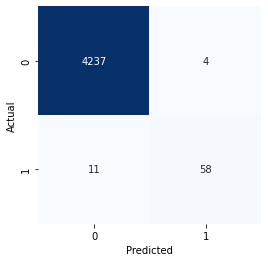

In [20]:
# printing a confusion matrix
cm = confusion_matrix(y_test, y_pred)
index=[0, 1]
columns=[0, 1]
df_cm = pd.DataFrame(data=cm, index=index, columns=columns)
plt.figure(figsize=(4,4))
ax = sns.heatmap(df_cm, annot=True, fmt=".0f", cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [21]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4241
           1       0.94      0.84      0.89        69

    accuracy                           1.00      4310
   macro avg       0.97      0.92      0.94      4310
weighted avg       1.00      1.00      1.00      4310



ROC AUC score: 0.9794


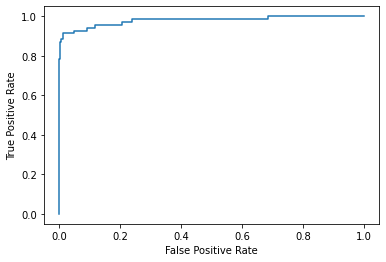

In [22]:
# roc auc scoring
y_proba = classifier_xg.predict_proba(X_test)

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(y_test, y_proba[:,1])

print(f'ROC AUC score: {roc_auc_score(y_test, y_proba[:,1]):.4f}')

<b>Feature importance with SHAP</b>

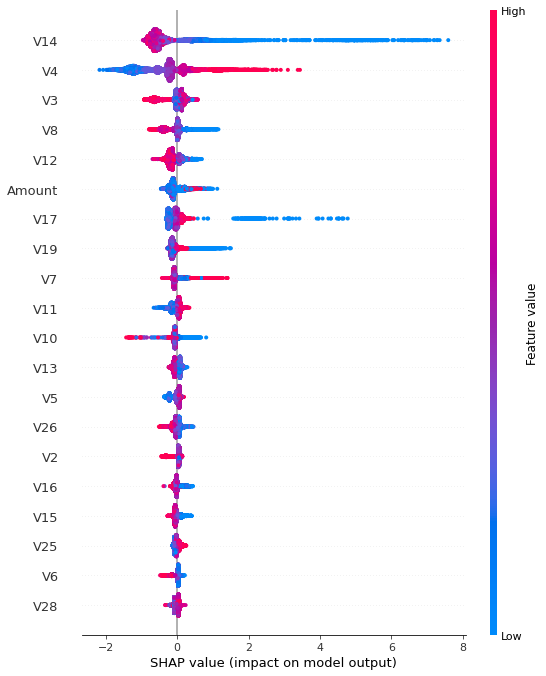

In [23]:
# defining data frames X and y
X_shap = df[num_vars]
y_shap = df[cat_vars]

# fitting xgb
model = XGBClassifier(random_state = 42)
model.fit(X_shap, y_shap)
# loading JS visualization code to notebook
shap.initjs()
# calculating shap values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_shap)
# plotting feature importance
shap.summary_plot(shap_values, features=X_shap, feature_names=X_shap.columns)

<h2>5. Discussion</h2>

With all variables included and originally distributed, XGBoost classifier demonstrates ROC AUC score 0.979. Probability cutoff 0.5 results in precision 0.94 and recall 0.84.